In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
titanic=pd.read_csv("train.csv")
titanic.shape

(891, 12)

In [3]:
titanic.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
548,549,0,3,"Goldsmith, Mr. Frank John",male,33.0,1,1,363291,20.5250,NaN,S
693,694,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,NaN,C


In [4]:
titanic.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

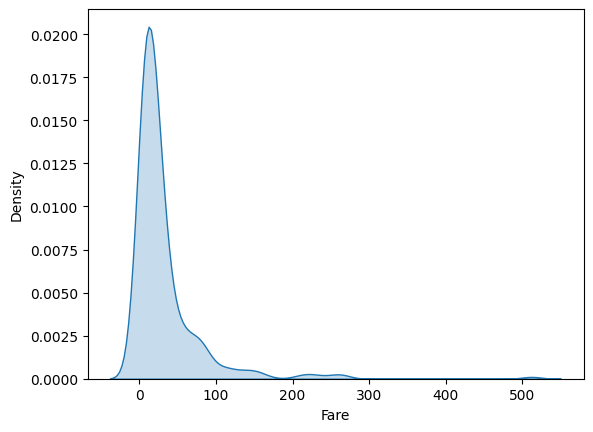

In [5]:
sns.kdeplot(data=titanic,x='Fare',fill=True)
plt.show()

In [6]:
samples=[]
for i in range(100):
    samples.append(titanic['Fare'].sample(60).values.tolist())

In [7]:
samples_array=np.array(samples)
samples_array.shape

(100, 60)

In [8]:
sampling_mean=samples_array.mean(axis=1)

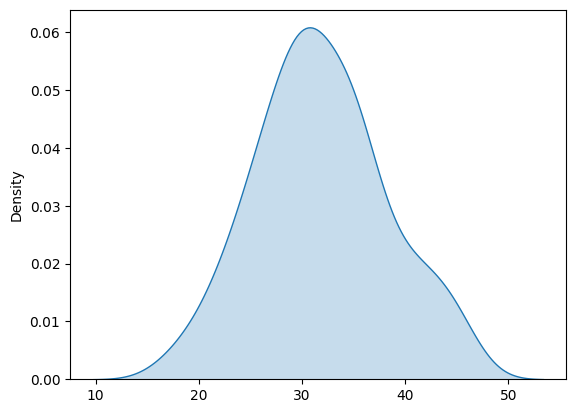

In [9]:
sns.kdeplot(sampling_mean,fill=True)
plt.show()

In [10]:
print(f"The sampling mean is:{round(sampling_mean.mean(),3)}")

The sampling mean is:31.817


In [11]:
print(f"The mean of fare is:{round(titanic['Fare'].mean(),3)}")

The mean of fare is:32.204


In [12]:
std=sampling_mean.std()/np.sqrt(60)

In [13]:
lower_limit=sampling_mean.mean()-2*std
upper_limit=sampling_mean.mean()+2*std
print("The range of mean of fare is:",lower_limit,"-",upper_limit)

The range of mean of fare is: 30.202379781631656 - 33.43118051836835


**Important Points:**

The goal of this script is to demonstrate the Central Limit Theorem (CLT) using the Titanic dataset. I focused on the Fare column, which is not normally distributed (it’s skewed). According to the CLT, if we draw multiple samples of size n ≥ 30 from any population, the distribution of the sample means will tend to be normally distributed, regardless of the population’s original distribution.

In this case, I took 100 random samples, each of size 60, and calculated the mean of each sample. I then plotted the distribution of these sample means. The resulting kdeplot clearly resembles a normal distribution, with:
- A mean approximately equal to the population mean
- A standard deviation close to population SD / √n

This supports the CLT in practice.
Additionally, I computed a 95% confidence interval for the mean.
 
This means that if I repeated this process many times, 95% of the time the true population mean would lie within the interval I calculated.
This technique is extremely useful in real-world situations, such as estimating the average salary in Nepal. Instead of surveying the entire population, we can draw a representative sample, apply the CLT, and make reliable inferences about the population mean.